# Analyse épidémiologique

Le but de ce TP est d'étudier deux modèles épidémiologiques, modélisant la propagation d’une épidémie au sein d'une population. 

## Le Modèle SIR

La population est constituée de trois catégories :
* $t\mapsto S(t)$ : Les individus sains n'ayant pas été infectés et susceptibles de l'être.
* $t\mapsto I(t)$ : Les individus infectés par la maladie et contagieux auprès de la population saine
* $t \mapsto R(t)$ : Le reste de la population, à savoir ceux qui ne peuvent plus être contaminés et qui ne sont plus contagieux.


Pour écrire le modèle, on fait les hypothèses suivantes :
* De nouveaux cas d'infections apparaissent lors du contact entre les population $S$ et $I$. On note $\beta$ la capacité que possède la maladie de contaminer la population $S$:
\begin{equation}
S'(t) = - \beta S(t) I(t).
\end{equation}
* La durée moyenne durant laquelle un individu est contagieux est noté $\tau$. En notant $f = 1/\tau$ la fréquence d'incubation, on a:
\begin{equation}
I'(t) = \beta S(t) I(t) - f I(t).
\end{equation}
* Enfin la population totale $N= S(t) + I(t) + R(t)$ est constante, et l'on a 
\begin{equation}
R'(t) = f I(t).
\end{equation}

Le problème s'écrit ainsi
\begin{align}
S'(t) &= - \beta S(t) I(t),\\
I'(t) &= \beta S(t) I(t) - f I(t),\\
R'(t) &= f I(t)
\end{align}

On note $X(t) = (S(t), I(t), R(t))$, $X_0 = (S_0, I_0, R_0)$, et par commodité, on prend $N=1$ (i.e. nous regardons des densités de population).



>**A faire :** Ecrire ce problème sous la forme d'un système différentiel autonome $X'(t) = F(X(t))$, ainsi qu'une fonction qui retourne $F$ et sa matrice Jacobienne. On choisira
\begin{equation}
\beta = 8, \quad f = 4,3.
\end{equation}

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beta=8.
f=4.3
def F_SIR(X):
    return np.array([-beta*X[0]*X[1], beta*X[0]*X[1]-f*X[1], f*X[1]])
def JF_SIR(X):
    return np.array([[-beta*X[1], -beta*X[0], 0], [beta*X[1], beta*X[0]-f, 0], [0, f, 0]])

>**A faire :** Ecrire les méthodes d'Euler explicite, RK2, Euler implicite et RK4 afin de résoudre numériquement le système jusqu'au temps  $𝑇=3$ . On choisira pour condition initiale  $𝑋_0=(0.99,0.01,0)$. Justifier en particulier cette condition initiale.

In [3]:
T=3.
x0=np.array([0.99,0.01,0])
dt=1e-3
NsolveNewton = 10

In [4]:
def solve(function,jacobian,method,X0,T,dt):
    Nstep = int(T/dt)
    X=np.zeros((3,Nstep+1))
    X[:,0] = x0
    for k in range(Nstep):
        X[:,k+1]=method(X[:,k],function,jacobian,dt)
    return X

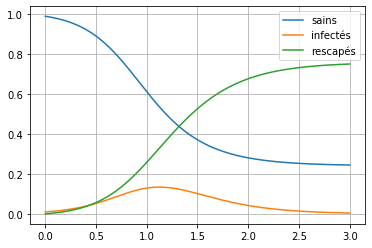

In [5]:
def Eulerexp(X,function,jacobian,dt):
    return X+dt*function(X)

X=solve(F_SIR,JF_SIR,Eulerexp,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

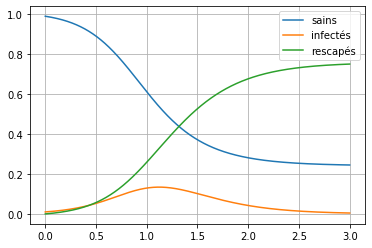

In [6]:
def RK2(X,function,jacobian,dt):
    k1=function(X)
    k2=function(X+dt*k1/2.)
    return X+dt*k2

X=solve(F_SIR,JF_SIR,RK2,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

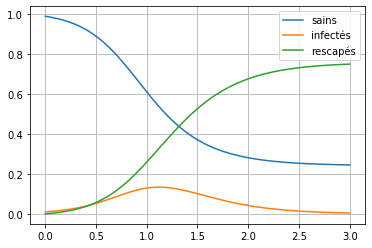

In [7]:
def Eulerimp(X,function,jacobian,dt):
    Y=X
    for i in range(NsolveNewton):
        Y=Y-np.linalg.solve(np.eye(3)-dt*jacobian(Y),Y-X-dt*function(Y))
    return Y

X=solve(F_SIR,JF_SIR,Eulerimp,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

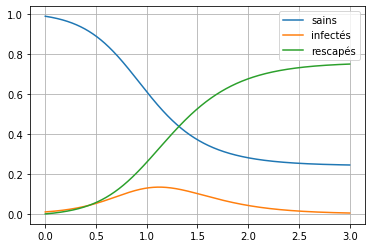

In [8]:
def RK4(X,function,jacobian,dt):
    k1=function(X)
    k2=function(X+dt*k1/2.)
    k3=function(X+dt*k2/2.)
    k4=function(X+dt*k3)
    return X+dt*(k1/6.+k2/3.+k3/3.+k4/6.)

X=solve(F_SIR,JF_SIR,RK4,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

>**A faire :** Tracer $I$ en fonction de $S$ pour différentes conditions initiales. On choisira par exemple $𝑋_0=(0.9+0.01k,0.1-0.01k,0)$ avec $k \in \left\lbrace 0,9 \right\rbrace$. Discuter les deux dynamiques observées ($S$ croissant/décroissant) en fonction de la courbe $S=f/\beta$. Conclure sur une stratégie de vaccination en fonction des paramètres.

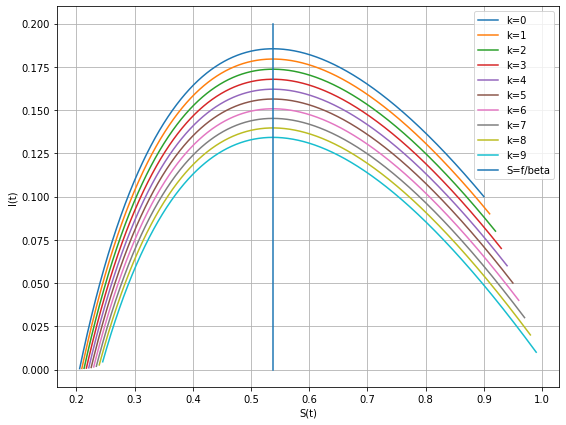

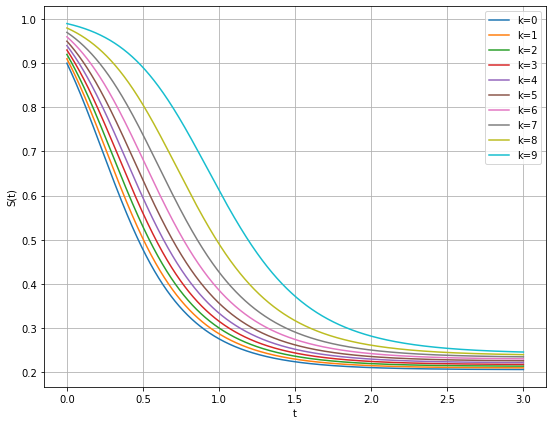

In [9]:
t=np.linspace(0,T,int(T/dt)+1)
for k in range(10):
    x0=np.array([0.9+0.01*k, 0.1-0.01*k, 0])
    X=solve(F_SIR,JF_SIR,RK4,x0,T,dt)
    plt.figure(1,figsize=(9,7))
    plt.plot(X[0],X[1], label='k='+str(k))
    plt.figure(2,figsize=(9,7))
    plt.plot(t,X[0], label='k='+str(k))

plt.figure(1)
plt.plot([f/beta,f/beta],[0,0.2],label='S=f/beta')
plt.legend()
plt.grid(True)
plt.xlabel('S(t)')
plt.ylabel('I(t)')
plt.figure(2)
plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()

>**Bonus :** (à faire après le modèle SZR ci-dessous) Etudier la durée de l'épidémie en fonction des paramètres. On pourra ecrire $I$ comme une fonction de $S$ et étudier la courbe obtenue. Etudier la durée de l'épidémie en fonction des paramètres.

## Modèle SZR : Invasion de Zombie

Une variante du modèle SIR est le modèle SZR proposé en 2009 par Munz, Hudea, Imad et Smith. On note toujours $S$ la population saine, $Z$ est maintenant une population de Zombie et $R$ représente la reste de la population, avec notamment les personnes mortes mais pouvant se transformées en Zombie. La dynamique est la suivante :
\begin{align}
S'(t) &= - \beta S(t) I(t),\\
I'(t) &= (\beta -\alpha) S(t) I(t) + \zeta R(t),\\
R'(t) &= \alpha S(t) I(t) -\zeta R(t).
\end{align}

* Lorsqu'une personne saine rencontre un Zombie, il y a deux possibilités : la personne saine est mordue et devient un Zombie (terme $-\beta SZ$), ou alors le Zombie est tué, et passe dans la population $R$ (terme $\alpha SZ$).

* La population $R$ peut spontanément se transformer en Zombie (terme $\zeta R$)

>**A faire :** Implémenter le champ de vecteur associé. Calculer sa Jacobienne et résoudre ce problème en utilisant les algorithmes d'Euler et de Runge-Kutta jusqu'au temps $T=120$. On choisira $\beta =1$, $\alpha = 4$ et $\zeta = 0.2$, ainsi que la population initiale 
\begin{equation*}
X_0 =[S_0,Z_0,R_0] = [0.99,0.01,0]
\end{equation*}

In [10]:
beta=1.
alpha=4.
eta=0.2
T=120.
x0=np.array([0.99, 0.01, 0])
def F_SZR(X):
    return np.array([-beta*X[0]*X[1], (beta-alpha)*X[0]*X[1]+eta*X[2], alpha*X[0]*X[1]-eta*X[2]])
def JF_SZR(X):
    return np.array([[-beta*X[1], -beta*X[0], 0], [(beta-alpha)*X[1], (beta-alpha)*X[0], eta], [alpha*X[1], alpha*X[0], -eta]])

/home/agossard/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


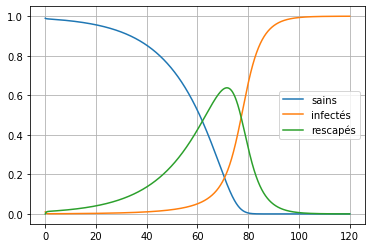

In [11]:
X=solve(F_SZR,JF_SZR,Eulerexp,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

/home/agossard/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


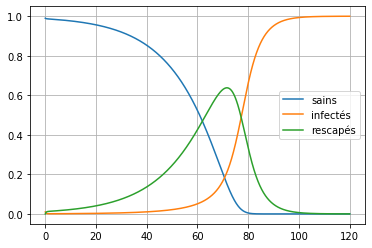

In [12]:
X=solve(F_SZR,JF_SZR,RK2,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

/home/agossard/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


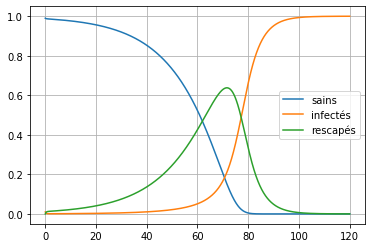

In [13]:
X=solve(F_SZR,JF_SZR,Eulerimp,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

/home/agossard/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


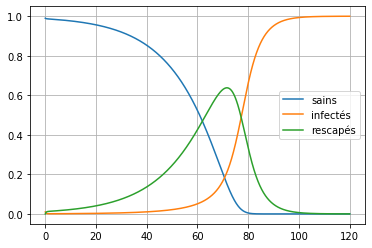

In [14]:
X=solve(F_SZR,JF_SZR,RK4,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend()
plt.grid(True)
plt.show()

### Ordre des méthodes

On suppose que la solution donnée par la méthode RK4 avec $\displaystyle h=\frac{T}{2^{18}}$ est une excellente approximation de la solution. On appelle $y(30)$ la valeur finale obtenue.

>**A faire :** Calculer au temps $T=30$, l'écart $\displaystyle E_{\text{Euler exp}}(h)=\left \|y(30)-y_{\text{Euler exp}}^h(30)\right \|$ entre cette solution et la solution donnée par Euler explicite au temps final $T$ pour le pas de temps $h$. Effectuer ce calcul pour $h=\frac{T}{2^k}$ avec $k \in \{ 8,\dots , 15\}$. Faire de même avec Euler implicite, RK2 et RK4.
Tracer sur un même graphe, $\ln (E)$ en fonction de $k$. Que pouvez vous en conclure?

In [15]:
T=30.
print("dt=",dt)
sol = solve(F_SZR,JF_SZR,RK4,x0,T,dt)[:,-1]
print(sol)

list_err=[]
methods=[Eulerexp,RK2,Eulerimp,RK4]
list_k=np.arange(8,16)
for m in methods:
    err=[]
    for k in list_k:
        dt=T/2.**k
        e=np.linalg.norm(sol-solve(F_SZR,JF_SZR,m,x0,T,dt)[:,-1])
        err.append(e)
    list_err.append(err)

dt= 0.001
[0.91984532 0.00529932 0.07485536]


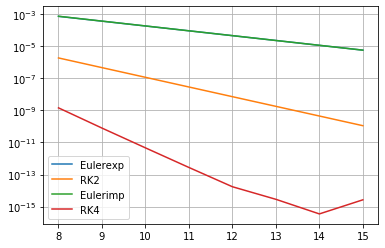

In [16]:
plt.semilogy(list_k,list_err[0],label='Eulerexp')
plt.semilogy(list_k,list_err[1],label='RK2')
plt.semilogy(list_k,list_err[2],label='Eulerimp')
plt.semilogy(list_k,list_err[3],label='RK4')
plt.legend()
plt.grid(True)
plt.show()

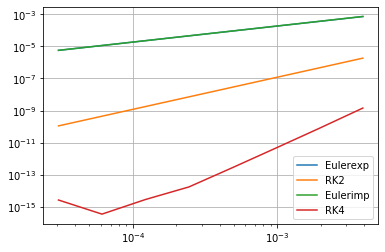

In [17]:
plt.loglog(1/(2**list_k),list_err[0],label='Eulerexp')
plt.loglog(1/(2**list_k),list_err[1],label='RK2')
plt.loglog(1/(2**list_k),list_err[2],label='Eulerimp')
plt.loglog(1/(2**list_k),list_err[3],label='RK4')
plt.legend()
plt.grid(True)
plt.show()

### Modèle avec vaccin

On suppose maintenant qu’un médicament existe, qu'il permet de guérir les zombies, et donc les faire repasser dans la catégorie $S$. Le modèle devient alors :
$$
\left \{
\begin{array}{l}
S'=- \beta SZ + c Z\\
Z' = (\beta -\alpha) SZ + \zeta R  - c Z\\
R' = \alpha SZ - \zeta R.
\end{array}
\right.
$$
>**A faire :** Calculez l'évolution de ce nouveau modèle, avec les mêmes paramètres que pour la question précédente, et différentes valeurs du paramètre $c$ (On pourra commencer avec $c=0.005$). Que constatez-vous ?

In [18]:
beta=1.
alpha=4.
eta=0.2
c=0.005
T=120.
dt=1e-3
x0=np.array([0.99, 0.01, 0])
def F_SZR_vaccin(X):
    return np.array([-beta*X[0]*X[1]+c*X[1], (beta-alpha)*X[0]*X[1]+eta*X[2]-c*X[1], alpha*X[0]*X[1]-eta*X[2]])
def JF_SZR_vaccin(X):
    return np.array([[-beta*X[1], -beta*X[0]+c, 0], [(beta-alpha)*X[1], (beta-alpha)*X[0]-c, eta], [alpha*X[1], alpha*X[0], -eta]])

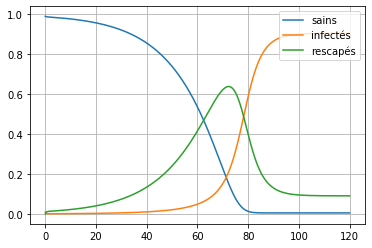

In [19]:
X=solve(F_SZR_vaccin,JF_SZR_vaccin,RK4,x0,T,dt)
t=np.linspace(0,T,int(T/dt)+1)
plt.plot(t,X[0],label='sains')
plt.plot(t,X[1],label='infectés')
plt.plot(t,X[2],label='rescapés')
plt.legend(loc=1)
plt.grid(True)
plt.show()

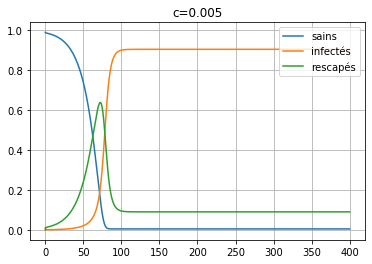

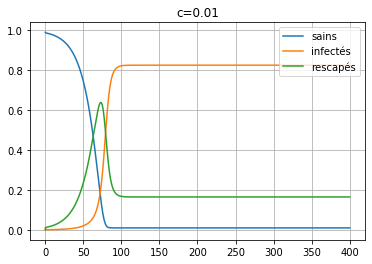

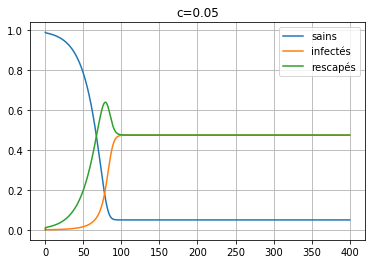

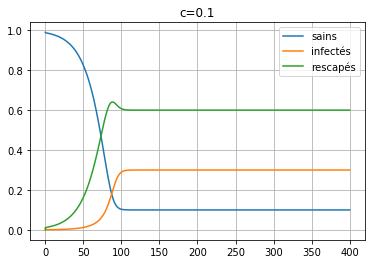

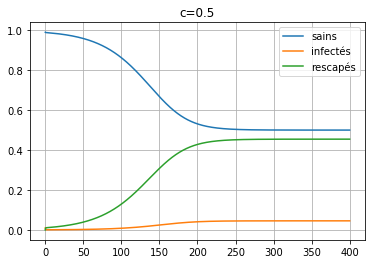

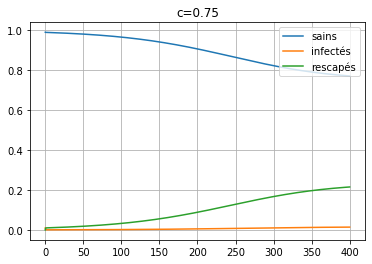

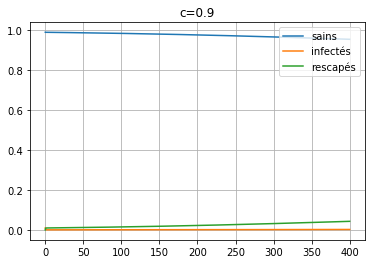

In [20]:
T=400.
list_c=[0.005,0.01,0.05,0.1,0.5,0.75,0.9]
for c in list_c:
    X=solve(F_SZR_vaccin,JF_SZR_vaccin,RK4,x0,T,dt)
    t=np.linspace(0,T,int(T/dt)+1)
    plt.plot(t,X[0],label='sains')
    plt.plot(t,X[1],label='infectés')
    plt.plot(t,X[2],label='rescapés')
    plt.legend(loc=1)
    plt.grid(True)
    plt.title("c="+str(c))
    plt.show()